<a href="https://colab.research.google.com/github/jdxxmahmud/mahdy-sir-re-acad-course/blob/main/Phase%201/Individual%20Assignments/Recorded%20Classes%20Notes/Machine%20Learning/Advanced%20ML/L03_04_Data_Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3> In this noebook we will learn about:

<ol>
  <li> Handling missing values
  <li> Imbalance dataset issue
  <li> Outliers
  <li> Converting /Encoding Data (Categorical to Numerical)
  <li> Duplicate Data
  <li> Splitting Dataset
  <li> Scaling Dataset
  <li> Feature Engineering
</ol>

### Part 1: Loading dataset from google drive and displaying dataset

##### Importing from google drive (Google Colab)

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive

Mounted at /content/drive
/content/drive


In [7]:
working_directory = 'MyDrive/Colab Notebooks/Mahdy Sir Research Academy Course/Phase 1/Individual Assignments/Recorded Class Notes/Advanced ML/Datasets/'

##### Importing from local PC (Jupyter Notebook, VS Code Notebook)

In [8]:
# working_directory = 'Datasets/'

In [9]:
dataset_name = 'diabetes_two.csv'

In [10]:
import pandas as pd

df = pd.read_csv(f'{working_directory}{dataset_name}')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,NaN,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,600.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [11]:
df.head(10)  # First 10 rows

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,NaN,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,600.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55.0,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57.0,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66.0,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67.0,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70.0,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [12]:
df.tail()  # Last 5 rows

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39.0,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48.0,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58.0,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32.0,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42.0,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [13]:
df[80:85]   # Show 80 to 84th rows, when you want to select specific number of rows

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
80,35.0,Female,Yes,Yes,No,Yes,No,No,Yes,No,No,No,No,No,No,No,Positive
81,47.0,Female,No,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes,No,No,Positive
82,50.0,Female,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,Yes,No,No,No,Positive
83,48.0,Female,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
84,35.0,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive


In [14]:
df['Gender']  # Showing the 'Gende Column'

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
515    Female
516    Female
517    Female
518    Female
519      Male
Name: Gender, Length: 520, dtype: object

In [15]:
df['Gender'].head()    # First 5 samples of 'Gender' Column

0    Male
1    Male
2    Male
3    Male
4    Male
Name: Gender, dtype: object

In [16]:
df.loc[df.Gender == 'Male']   # All males information

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,NaN,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,600.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,54.0,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
510,67.0,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No,Negative
511,66.0,Male,No,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
512,43.0,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative


In [17]:
df.loc[(df.Gender == 'Male') & (df.Age > 25)]   # All male with age over 25 years

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,600.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55.0,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,54.0,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
510,67.0,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No,Negative
511,66.0,Male,No,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
512,43.0,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative


In [18]:
df.iloc[[0, 5]]  # Print only index 0 and 5

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
5,55.0,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive


In [19]:
df.iloc[[0, 1, 2, 3, 4, 5]]  # Print index 0, 1, 2, 3, 4, 5

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,NaN,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,600.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55.0,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive


In [20]:
df.iloc[0:5]  # Print index 0 to 4

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,NaN,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,600.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [21]:
df.Gender.iloc[80:85]   # Printing 80 to 84 index of only Gender column

80    Female
81    Female
82    Female
83    Female
84    Female
Name: Gender, dtype: object

In [22]:
df.columns  # Show all columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [23]:
len(df)   # How many rows are in the dataframe df

520

### Part 2: Handling Missing Values

In [24]:
df.isnull()   # Give true if null found, false if not

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
df.isnull().sum()   # Gives the total null values for each column

Age                   1
Gender                1
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              1
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [26]:
df.info()    # Dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 519 non-null    float64
 1   Gender              519 non-null    object 
 2   Polyuria            520 non-null    object 
 3   Polydipsia          520 non-null    object 
 4   sudden weight loss  520 non-null    object 
 5   weakness            519 non-null    object 
 6   Polyphagia          520 non-null    object 
 7   Genital thrush      520 non-null    object 
 8   visual blurring     520 non-null    object 
 9   Itching             520 non-null    object 
 10  Irritability        520 non-null    object 
 11  delayed healing     520 non-null    object 
 12  partial paresis     520 non-null    object 
 13  muscle stiffness    520 non-null    object 
 14  Alopecia            520 non-null    object 
 15  Obesity             520 non-null    object 
 16  class   

In [27]:
df.describe()   # Works only for the columns with numerical data

,Age
count,519.000000
mean,49.082852
std,27.104027
min,16.000000
25%,39.000000
50%,48.000000
75%,57.000000
max,600.000000


In [28]:
# Making some copies of the dataframe

df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

#### 2.A Dropping the entire row that has missing values

In [29]:
df1.dropna(subset=['Age'], inplace = True)
df1.dropna(subset=['Gender'], inplace = True)
df1.dropna(subset=['weakness'], inplace = True)

In [54]:
df1.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [31]:
len(df1)

517

For this code, we will drop na for df as well

In [56]:
df.dropna(inplace = True)

#### 2.B Changing null values to some other values

Now we will put some value in the null place. For numeric null value it can be the mean/median/mode of the column and for the categorical value it can be the most frequent value of the column.
We can do this when there are too many missing / null values in a column. Because if we delete so many rows for removing null values, not much of the dataset will be left.

In [32]:
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())  # Replace by mean
# df2['Age'] = df2['Age'].fillna(df2['Age'].median()) # Replace by median

In [33]:
most_frequent_category = df2['Gender'].mode().iloc[0]    # Find the most frequent category
df2['Gender'].fillna(most_frequent_category, inplace = True)  # Replacing the null values with the most frequent value inplace

### Part 3: Handling categorical values of encoding

#### 3.A Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()

The columns that have 'object' data type will now be encoded

In [36]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Polyuria'] = le.fit_transform(df['Polyuria'])
df['Polydipsia'] = le.fit_transform(df['Polydipsia'])
df['sudden weight loss'] = le.fit_transform(df['sudden weight loss'])
df['weakness'] = le.fit_transform(df['weakness'])
df['Polyphagia'] = le.fit_transform(df['Polyphagia'])
df['Genital thrush'] = le.fit_transform(df['Genital thrush'])
df['visual blurring'] = le.fit_transform(df['visual blurring'])
df['Itching'] = le.fit_transform(df['Itching'])
df['Irritability'] = le.fit_transform(df['Irritability'])
df['delayed healing'] = le.fit_transform(df['delayed healing'])
df['partial paresis'] = le.fit_transform(df['partial paresis'])
df['muscle stiffness'] = le.fit_transform(df['muscle stiffness'])
df['Alopecia'] = le.fit_transform(df['Alopecia'])
df['Obesity'] = le.fit_transform(df['Obesity'])
df['class'] = le.fit_transform(df['class'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 519 non-null    float64
 1   Gender              520 non-null    int64  
 2   Polyuria            520 non-null    int64  
 3   Polydipsia          520 non-null    int64  
 4   sudden weight loss  520 non-null    int64  
 5   weakness            520 non-null    int64  
 6   Polyphagia          520 non-null    int64  
 7   Genital thrush      520 non-null    int64  
 8   visual blurring     520 non-null    int64  
 9   Itching             520 non-null    int64  
 10  Irritability        520 non-null    int64  
 11  delayed healing     520 non-null    int64  
 12  partial paresis     520 non-null    int64  
 13  muscle stiffness    520 non-null    int64  
 14  Alopecia            520 non-null    int64  
 15  Obesity             520 non-null    int64  
 16  class   

##### Another way of doing the same thing

As we know that only 'Age' column is numeric here. We will get all the columns except 'Age' here.

In [38]:
object_columns = list(df.columns)
object_columns.remove('Age')

object_columns

['Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity',
 'class']

In [39]:
for column in object_columns:
  df3[column] = le.fit_transform(df[column])

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 519 non-null    float64
 1   Gender              520 non-null    int64  
 2   Polyuria            520 non-null    int64  
 3   Polydipsia          520 non-null    int64  
 4   sudden weight loss  520 non-null    int64  
 5   weakness            520 non-null    int64  
 6   Polyphagia          520 non-null    int64  
 7   Genital thrush      520 non-null    int64  
 8   visual blurring     520 non-null    int64  
 9   Itching             520 non-null    int64  
 10  Irritability        520 non-null    int64  
 11  delayed healing     520 non-null    int64  
 12  partial paresis     520 non-null    int64  
 13  muscle stiffness    520 non-null    int64  
 14  Alopecia            520 non-null    int64  
 15  Obesity             520 non-null    int64  
 16  class   

In [40]:
df3.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58.0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,NaN,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45.0,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,600.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


#### 3.B One Hot Encoding

This method creates a new column for each categorial value. Even the target column gets separated as well.

In [41]:
one_hot_encoded_data = pd.get_dummies(df, columns = object_columns)

In [42]:
one_hot_encoded_data.head()

,Age,Gender_0,Gender_1,Gender_2,Polyuria_0,Polyuria_1,Polydipsia_0,Polydipsia_1,sudden weight loss_0,sudden weight loss_1,...,partial paresis_0,partial paresis_1,muscle stiffness_0,muscle stiffness_1,Alopecia_0,Alopecia_1,Obesity_0,Obesity_1,class_0,class_1
0,40.0,0,1,0,1,0,0,1,1,0,...,1,0,0,1,0,1,0,1,0,1
1,58.0,0,1,0,1,0,1,0,1,0,...,0,1,1,0,0,1,1,0,0,1
2,NaN,0,1,0,0,1,1,0,1,0,...,1,0,0,1,0,1,1,0,0,1
3,45.0,0,1,0,1,0,1,0,0,1,...,1,0,1,0,1,0,1,0,0,1
4,600.0,0,1,0,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1


In [43]:
# We will see that there are so many columns

one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   519 non-null    float64
 1   Gender_0              520 non-null    uint8  
 2   Gender_1              520 non-null    uint8  
 3   Gender_2              520 non-null    uint8  
 4   Polyuria_0            520 non-null    uint8  
 5   Polyuria_1            520 non-null    uint8  
 6   Polydipsia_0          520 non-null    uint8  
 7   Polydipsia_1          520 non-null    uint8  
 8   sudden weight loss_0  520 non-null    uint8  
 9   sudden weight loss_1  520 non-null    uint8  
 10  weakness_0            520 non-null    uint8  
 11  weakness_1            520 non-null    uint8  
 12  weakness_2            520 non-null    uint8  
 13  Polyphagia_0          520 non-null    uint8  
 14  Polyphagia_1          520 non-null    uint8  
 15  Genital thrush_0      5

### Part 4: Imbalance Dataset Issue

In [44]:
df['class'].unique() # finding unique values

array([1, 0])

In [45]:
df['class'].nunique() # Finding number of unique values

2

#### 4.A Undersampling means reducing the major class samples to match minor class samples

In [46]:
from sklearn.utils import resample

majority_class = df[df['class'] == 1]
minority_class = df[df['class'] == 0]

n_samples = len(minority_class)

majority_downsampled = resample(majority_class, replace = False, n_samples = n_samples, random_state = 42)

balanced_df = pd.concat([minority_class, majority_downsampled])

In [48]:
value_counts = balanced_df.groupby('class').size().reset_index(name = 'count')
print(value_counts)

   class  count
0      0    200
1      1    200


#### 4.B Oversampling (SMOTE): Increasing the sample of minor class

In [51]:
from imblearn.over_sampling import SMOTE

In [59]:
X = df.drop('class', axis = 1)
y = df['class']

smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X, y)

oversampled_df = pd.DataFrame(X_resampled, columns = X.columns)
oversampled_df['class'] = y_resampled

### Part 5: Outlier finding and removing

#### 5.A Finding from figure

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

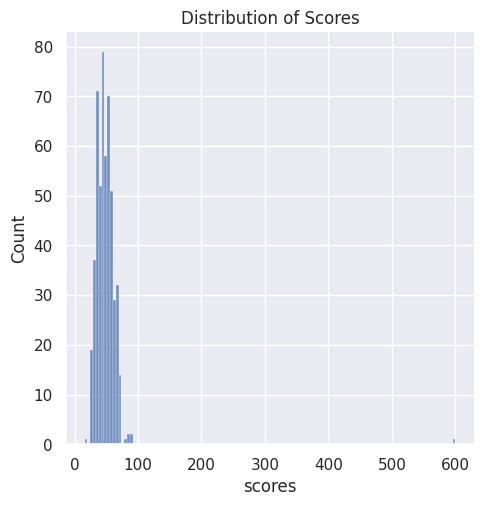

In [65]:
sns.set_theme(color_codes = 'red')
sns.displot(data=df['Age']).set(title = "Distribution of Scores", xlabel = "scores")

#### 5.B Statistical Approach

In [66]:
df.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,49.082852,0.631985,0.495183,0.448940,0.418112,0.587669,0.454721,0.223507,0.448940,0.485549,0.242775,0.458574,0.431599,0.373796,0.342967,0.169557,0.614644
std,27.104027,0.486714,0.500459,0.497866,0.493725,0.496632,0.498426,0.416997,0.497866,0.500273,0.429174,0.498762,0.495777,0.484277,0.475159,0.375605,0.487149
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,600.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 5.C By finding Z-score approach[-3 to 3]

In [69]:
z_score = (df['Age'] - df['Age'].mean())/df['Age'].std()
z_score

0      -0.335111
1       0.328997
3      -0.150636
4      20.326026
5       0.218313
         ...    
515    -0.372006
516    -0.039952
517     0.328997
518    -0.630270
519    -0.261321
Name: Age, Length: 519, dtype: float64

In [68]:
for i in z_score:
  if i < -3:
    print(f"You have outlier {i}")
  elif i > 3:
    print(f"You have outlier {i}")



You have outlier 20.326025968728597


In [71]:
# Index of the outlier

index = z_score.index[z_score == 20.326025968728597][0]
index

4

In [72]:
df['Age'][4]    # Find the exact value of the index

600.0

In [74]:
df['Age'][4] = df['Age'].mean()   # Now we will replace the outlier by the mean value of 'Age'

<ipython-input-74-834728042e66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][4] = df['Age'].mean()   # Now we will replace the outlier by the mean value of 'Age'


In [75]:
df['Age'][4]  # Check if the value if updated by the mean or not

49.08285163776493

### Part 6: Handling Duplicated Samples

In [76]:
duplicates = df[df.duplicated(keep = 'first')]   # Finding the duplicates

duplicates

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
84,35.0,0,1,1,1,1,1,0,1,1,0,1,1,1,0,0,1
159,38.0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1
160,28.0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
161,68.0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1
162,35.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,53.0,1,0,0,0,1,0,0,1,1,0,1,0,1,1,0,0
497,47.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
498,68.0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1
499,64.0,1,0,0,0,1,1,0,1,1,1,1,0,1,1,0,0


In [77]:
df_no_duplicates = df.drop_duplicates()  # Drop the duolicates

In [78]:
duplicates = df_no_duplicates[df_no_duplicates.duplicated(keep = 'first')]  # Recheck if duplicate remaining, if not, continue.
duplicates

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class


### Part 7: Feature Engineering

Here we are creating heatmap, using **Pearson Correlation Method**

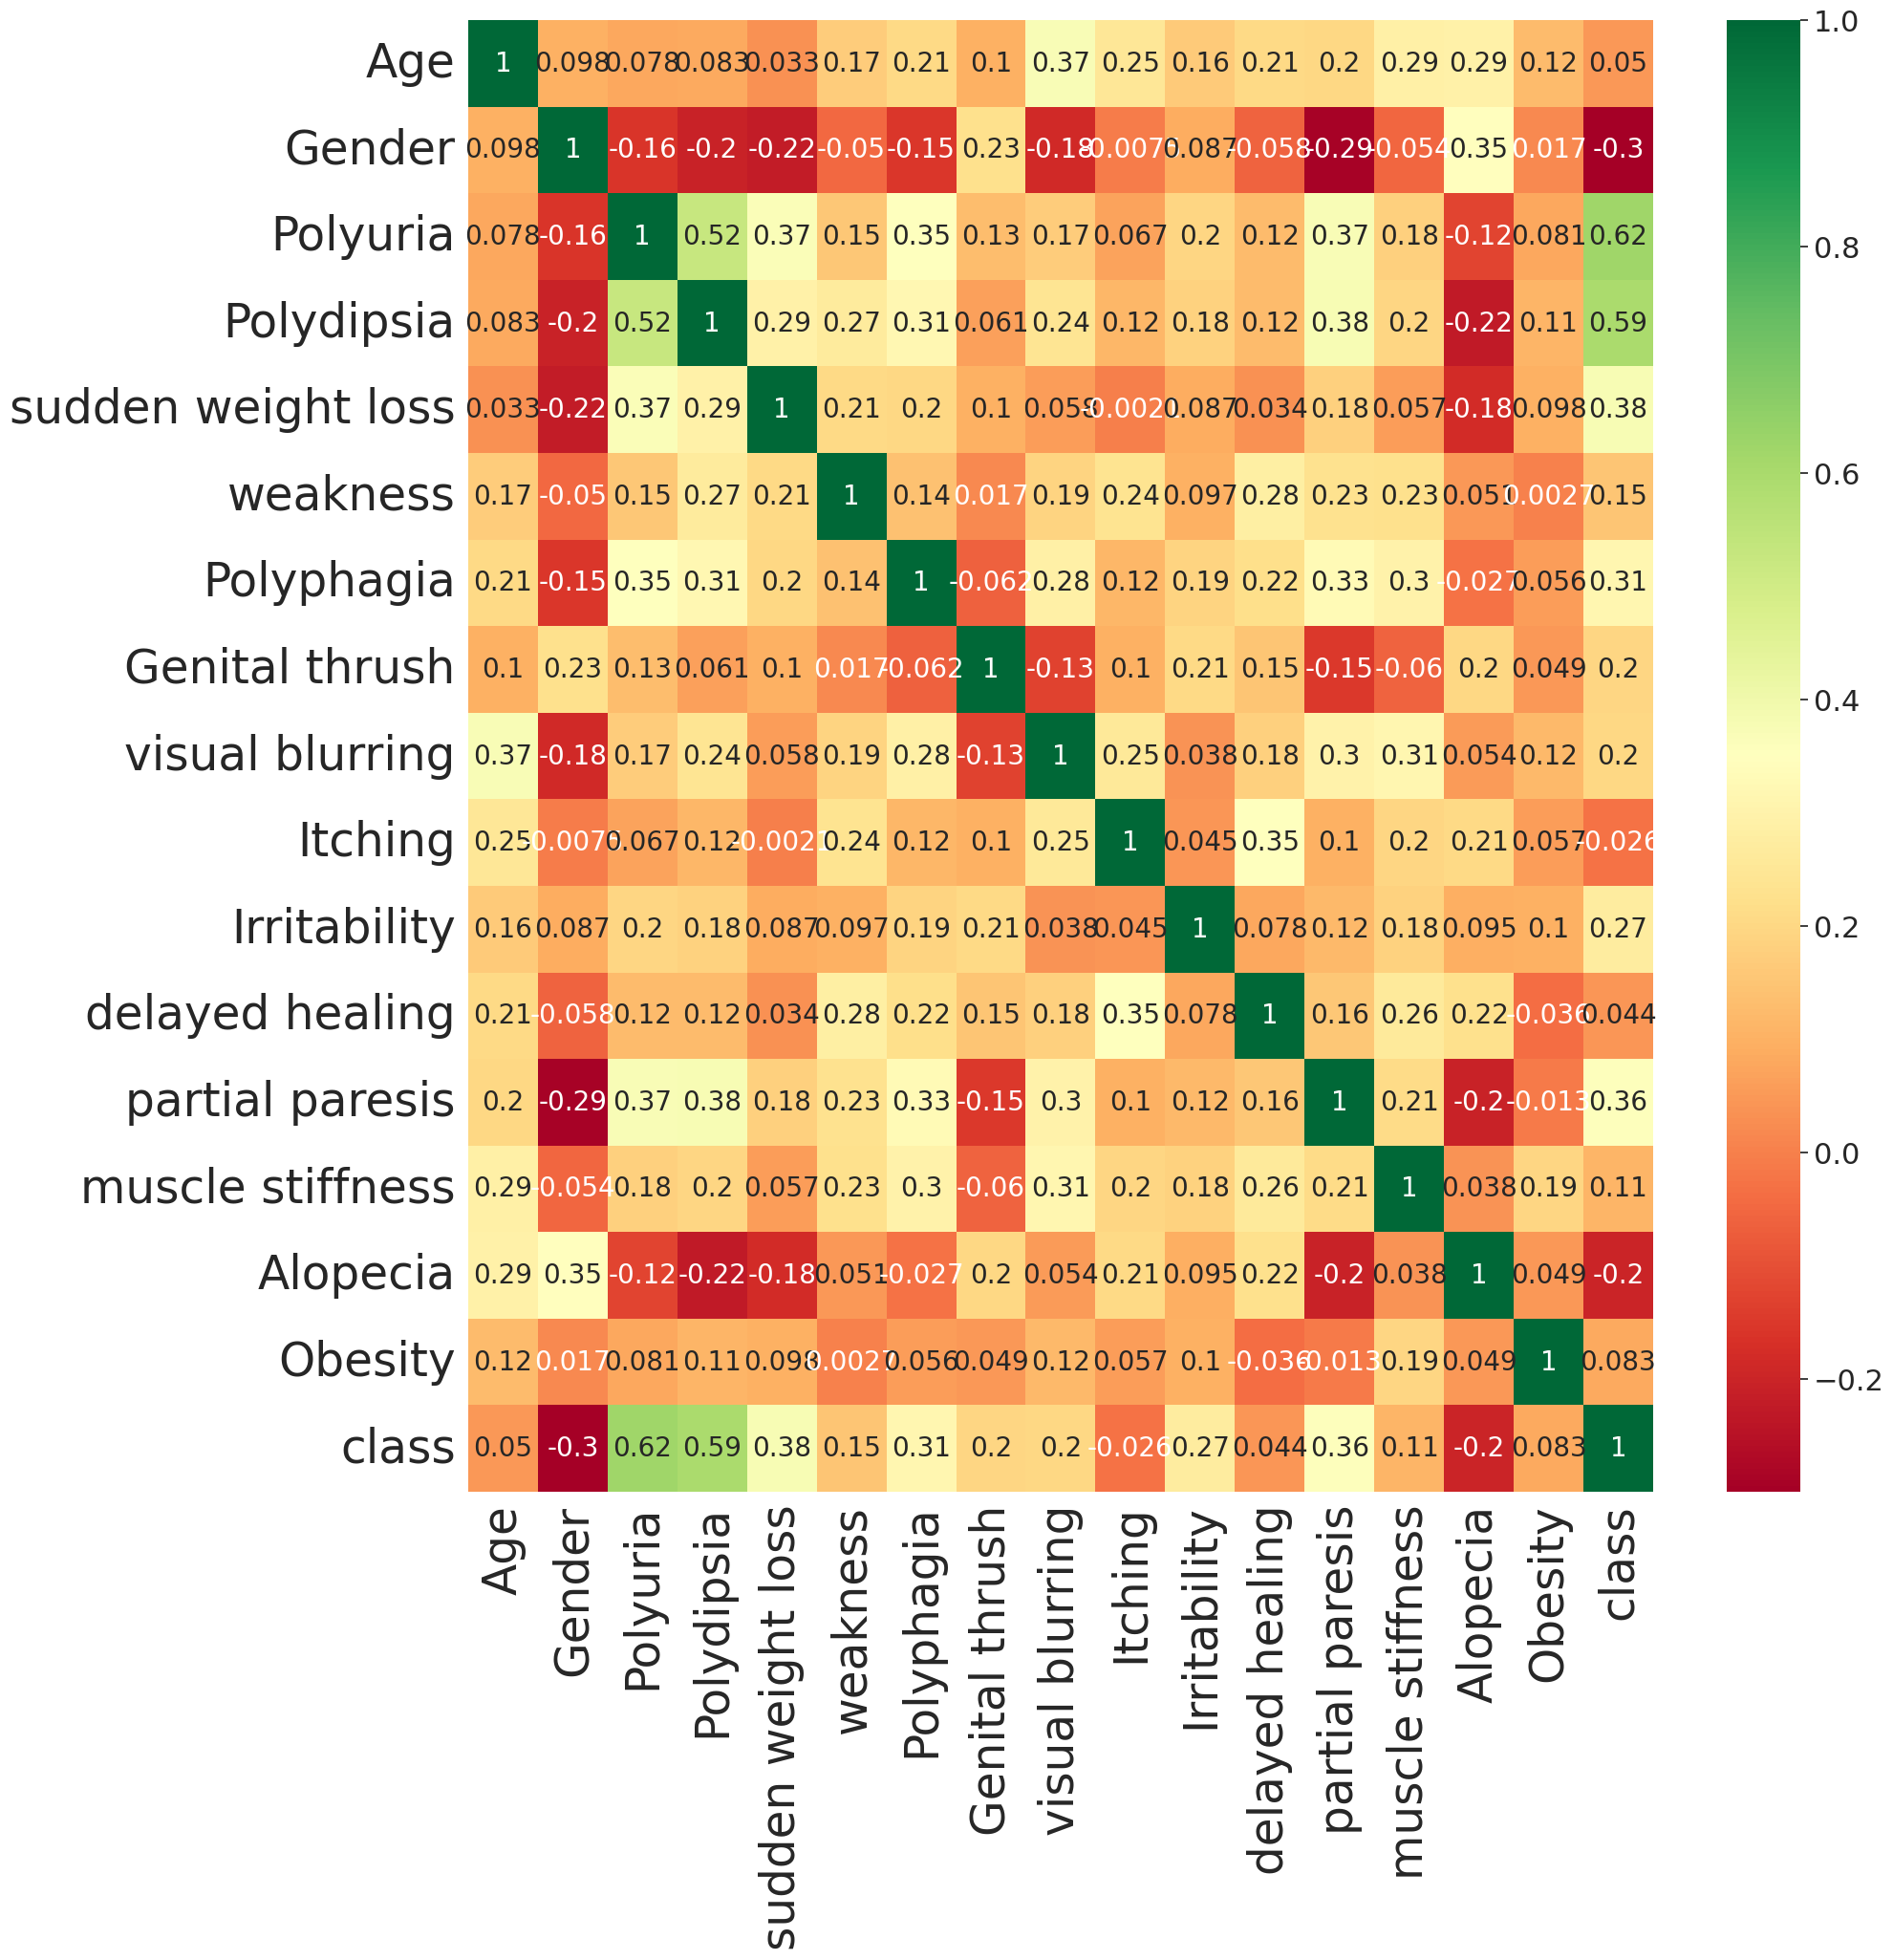

In [80]:
sns.set(font_scale = 2)
plt.subplots(figsize = (20, 20))

heat_plot = sns.heatmap(df_no_duplicates.corr(method = 'pearson'), annot = True, cmap = 'RdYlGn', annot_kws = {'size': 20})  # Pearson correlation / heatmap

plt.yticks(fontsize = 35)
plt.xticks(fontsize = 35)

plt.show()

### Part 7: Separating Feature and Target

In [81]:
df_no_duplicates

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.000000,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58.000000,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
3,45.000000,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,49.082852,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55.000000,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.000000,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48.000000,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58.000000,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32.000000,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [82]:
from sklearn.utils import shuffle
shuffeled_df = shuffle(df_no_duplicates)

In [83]:
shuffeled_df  # See shuffled data, look at the 'class' column

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
20,62.0,1,1,1,0,1,1,0,1,0,1,0,1,1,0,0,1
41,50.0,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,1
194,43.0,1,0,0,1,1,1,1,1,1,1,1,0,0,0,0,1
212,43.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
134,35.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,35.0,1,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1
427,39.0,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1
103,72.0,1,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1
76,48.0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1


In [89]:
rearranged_df = shuffeled_df.reset_index(drop = True)   # Rearranging the index values
rearranged_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,62.0,1,1,1,0,1,1,0,1,0,1,0,1,1,0,0,1
1,50.0,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,1
2,43.0,1,0,0,1,1,1,1,1,1,1,1,0,0,0,0,1
3,43.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,35.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,35.0,1,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1
247,39.0,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1
248,72.0,1,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1
249,48.0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1


In [90]:
X = rearranged_df.drop(columns = ['class'])
X

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,62.0,1,1,1,0,1,1,0,1,0,1,0,1,1,0,0
1,50.0,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0
2,43.0,1,0,0,1,1,1,1,1,1,1,1,0,0,0,0
3,43.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,35.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,35.0,1,1,0,0,0,1,1,0,0,1,1,0,0,1,0
247,39.0,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0
248,72.0,1,1,0,1,1,1,0,0,0,1,1,1,1,1,0
249,48.0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0


In [91]:
y = rearranged_df['class']
y

0      1
1      1
2      1
3      0
4      1
      ..
246    1
247    1
248    1
249    1
250    1
Name: class, Length: 251, dtype: int64

### Part 8: Scaling Data

In [92]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [95]:
scaler1 = MinMaxScaler()
MinMax_scaled_df = scaler1.fit_transform(x)     # min-max scaling (0 to 1)
MinMax_scaled_df

array([[0.04109589, 0.5       , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.07191781, 0.5       , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [       nan, 0.5       , 1.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.07191781, 0.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.02739726, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.04452055, 0.5       , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [96]:
scaler2 = StandardScaler()
STD_scaled_df = scaler2.fit_transform(x)     # Standard scaling
STD_scaled_df

array([[-0.3354341 ,  0.75570851, -0.99233705, ...,  1.29099445,
         1.38022749,  2.21564684],
       [ 0.32931459,  0.75570851, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       [        nan,  0.75570851,  1.00772212, ...,  1.29099445,
         1.38022749, -0.45133547],
       ...,
       [ 0.32931459, -1.3017178 ,  1.00772212, ...,  1.29099445,
        -0.72451824,  2.21564684],
       [-0.63087796, -1.3017178 , -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       [-0.26157313,  0.75570851, -0.99233705, ..., -0.77459667,
        -0.72451824, -0.45133547]])

### Part 9: Splitting Data (train and test dataset)

In [97]:
from sklearn.model_selection import train_test_split

Split randomly 20% data for testing and 80% for training </br>
x_train means the features of training data </br>
y_train means the target of training data

In [98]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [99]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 186 to 124
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 200 non-null    float64
 1   Gender              200 non-null    int64  
 2   Polyuria            200 non-null    int64  
 3   Polydipsia          200 non-null    int64  
 4   sudden weight loss  200 non-null    int64  
 5   weakness            200 non-null    int64  
 6   Polyphagia          200 non-null    int64  
 7   Genital thrush      200 non-null    int64  
 8   visual blurring     200 non-null    int64  
 9   Itching             200 non-null    int64  
 10  Irritability        200 non-null    int64  
 11  delayed healing     200 non-null    int64  
 12  partial paresis     200 non-null    int64  
 13  muscle stiffness    200 non-null    int64  
 14  Alopecia            200 non-null    int64  
 15  Obesity             200 non-null    int64  
dtypes: flo

In [100]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 200 entries, 186 to 124
Series name: class
Non-Null Count  Dtype
--------------  -----
200 non-null    int64
dtypes: int64(1)
memory usage: 3.1 KB


In [101]:
print(f"Train Data Size (Features): {len(x_train)}")
print(f"Train Data Size (Target): {len(y_train)}")

print(f"Test Data Size (Features): {len(x_test)}")
print(f"Test Data Size (Target): {len(y_test)}")

Train Data Size (Features): 200
Train Data Size (Target): 200
Test Data Size (Features): 51
Test Data Size (Target): 51
